In [1]:
from pkgman import include
include(["pandas", "polars", "rich", "tqdm", "requests", "matplotlib", "seaborn", "numpy", "igraph"])

pd = pandas
pl = polars
tqdm = tqdm
rq = requests
plt = matplotlib.pyplot
sns = seaborn
np = numpy
pp = rich.print
ig = igraph

[pkgman] Installing and importing ['pandas', 'polars', 'rich', 'tqdm', 'requests', 'matplotlib', 'seaborn', 'numpy', 'igraph']...
[pkgman] 9 packages have been imported.


# Read data

In [2]:
df_path = "../data/result/users.jsonl"
df = pd.read_json(df_path, lines=True)
# extract follower list from follower_meta column
df["followers"] = df["follower_meta"].apply(lambda x: [i["user"] for i in x])
# extract following list from following_meta column
df["following"] = df["following_meta"].apply(lambda x: [i["user"] for i in x])

# 1. Find the user with the most followers
df_followers = df[["user_id", "followers"]]
# convert user_id to index
df_followers = df_followers.set_index("user_id")
# explode followers and following columns
df_followers = df_followers.explode("followers")
df_followers = df_followers[~df_followers["followers"].isna()]
# convert index to column
df_followers = df_followers.reset_index()
# rename columns
df_followers.columns = ["target", "source"]
df_followers = df_followers[["source", "target"]]
df_followers.head(30)


,source,target
0,mktn,dc0420
1,antoniomae,Kentuss
2,Mohamedelamoury,nlptown
3,simarHug,nlptown
4,Wauplin,nlptown
5,fideliskailan,nlptown
6,l3aroui,nlptown
7,dani-garcia,nlptown
8,alessandropessoa,nlptown
9,conwaychriscosmo,nlptown


In [3]:

# 2. Find the user with the most followings
df_following = df[["user_id", "following"]]
# convert user_id to index
df_following = df_following.set_index("user_id")
# explode followers and following columns
df_following = df_following.explode("following")
df_following = df_following[~df_following["following"].isna()]
# convert index to column
df_following = df_following.reset_index()
# rename columns
df_following.columns = ["source", "target"]
df_following.head(30)

,source,target
0,dc0420,TheBloke
1,Kentuss,ryzen88
2,Kentuss,molbal
3,yangwang825,Qibin
4,yangwang825,gowitheflow
5,hshetty,m-ric
6,hshetty,kashif
7,hshetty,spaces-ci-bot
8,hshetty,SaylorTwift
9,hshetty,whitphx


In [4]:
df_edges = pd.concat([df_followers, df_following])
df_edges = df_edges.drop_duplicates()
df_edges.head(30)

,source,target
0,mktn,dc0420
1,antoniomae,Kentuss
2,Mohamedelamoury,nlptown
3,simarHug,nlptown
4,Wauplin,nlptown
5,fideliskailan,nlptown
6,l3aroui,nlptown
7,dani-garcia,nlptown
8,alessandropessoa,nlptown
9,conwaychriscosmo,nlptown


# Construct a social network

In [5]:
# !pip install pycairo

In [6]:
# !conda install pycairo -y

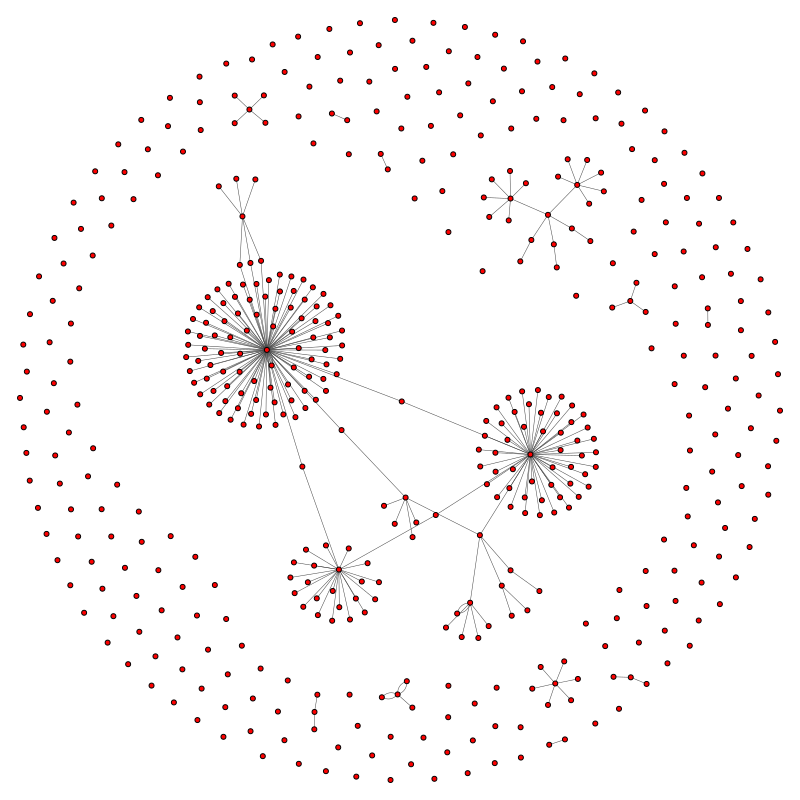

In [7]:
# df_edges = df_edges.sample(1000)
# Create the graph
g = ig.Graph()

# Add edges to the graph from the DataFrame
for index, row in df_edges.iterrows():
    g.add_vertex(row['source'])
    g.add_vertex(row['target'])
    g.add_edge(row['source'], row['target'])

# Visualize the graph
ig.plot(g, bbox=(0, 0, 800, 800), vertex_size=5, vertex_label_size=5, edge_arrow_size=0.5, edge_width=0.5)


In [10]:
edges_path = "../data/process/social.network/network.edges.csv"
df_edges.to_csv(edges_path, index=False)
model_path = "../data/process/social.network/network.gml"
g.save(model_path)
# g = ig.load(model_path)

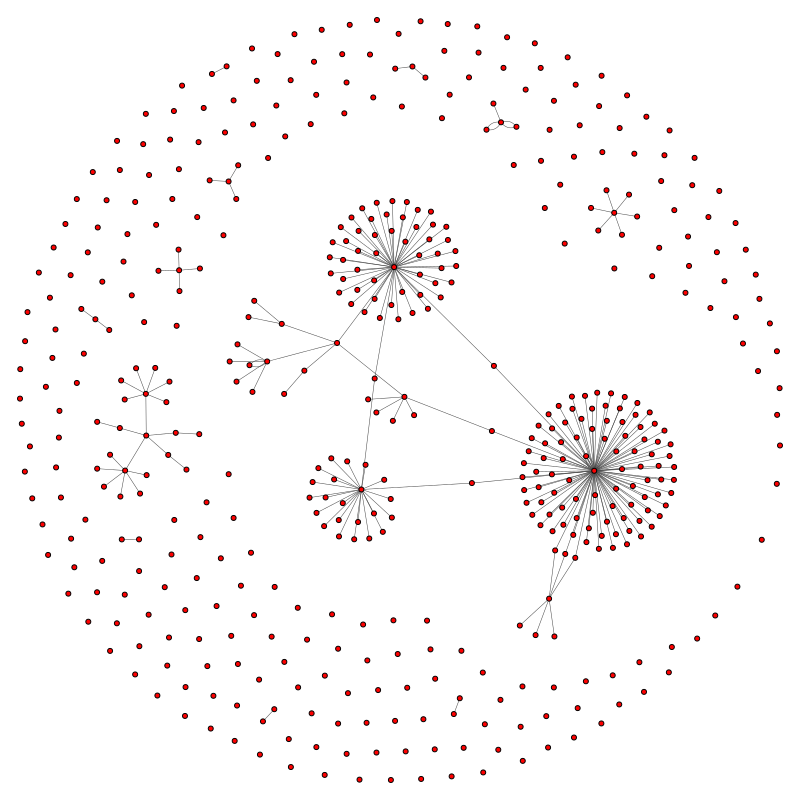

In [11]:
# save the graph as a pdf 
pdf_path = "../output/figure/network.pdf"
ig.plot(g, pdf_path, bbox=(0, 0, 800, 800), vertex_size=5, vertex_label_size=5, edge_arrow_size=0.5, edge_width=0.5)